In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
norm_info_train= norm_info[norm_info['phase']=='train']
norm_info_val= norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [11]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,layer_dict.conv0_feature_L2norm,layer_dict.conv1_feature_L2norm,layer_dict.conv2_feature_L2norm,layer_dict.conv3_feature_L2norm,layer_dict.linear_feature_L2norm,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,...,layer_dict.linear.weights_weight_L1norm,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_alpha
num_step,,,,,,,,,,,,,,,,,,,,,
0,1313.764365,420.088086,144.802709,23.160034,2.047564,-0.000030,20.682840,1.061912,-0.004531,173.739642,...,336.920152,6.264090,77.652069,-1.463091e-09,0.070103,0.037509,-0.009443,0.098712,0.053041,0.010848
1,1313.610339,420.110352,144.864401,23.224560,5.404526,0.000115,33.739247,1.784043,-0.004531,173.739719,...,343.314730,6.310820,77.379484,-5.710421e-10,0.085352,0.045114,-0.009443,0.098771,0.053072,0.010765
2,1314.504320,420.005513,144.335446,25.349571,11.365543,-0.000154,25.167772,1.240694,-0.004531,173.739557,...,359.569927,6.498804,77.487919,9.292644e-10,0.088976,0.046534,-0.009443,0.098864,0.053120,0.010654
3,1315.120786,419.957250,143.887087,27.886227,18.267023,-0.000250,12.267046,0.592352,-0.004531,173.739117,...,379.579975,6.787969,77.706577,1.265848e-09,0.029381,0.015596,-0.009443,0.098981,0.053181,0.010554
4,1315.497637,419.936168,143.525581,30.535133,26.211531,-0.000089,3.990540,0.198831,-0.004529,173.738567,...,400.944325,7.153379,77.950159,1.002330e-10,0.006478,0.003539,-0.009443,0.099114,0.053251,0.010472


<Figure size 800x600 with 0 Axes>

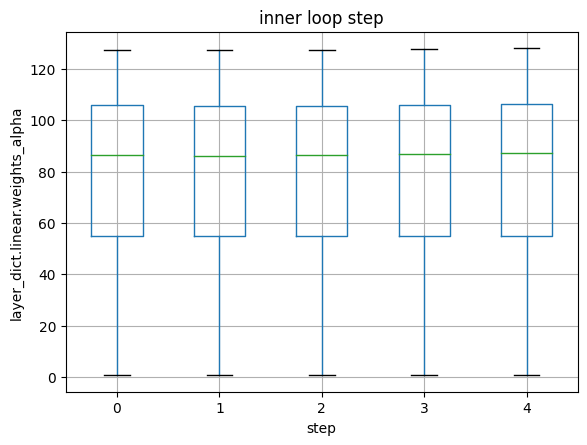

In [12]:
plt.figure(figsize=(8, 6))
norm_info_train.boxplot(column='layer_dict.linear.weights_alpha', by='num_step')
plt.title('inner loop step')
plt.xlabel('step')
plt.ylabel('layer_dict.linear.weights_alpha')
plt.suptitle('')  # 기본 제목 제거
plt.show()

<Figure size 800x600 with 0 Axes>

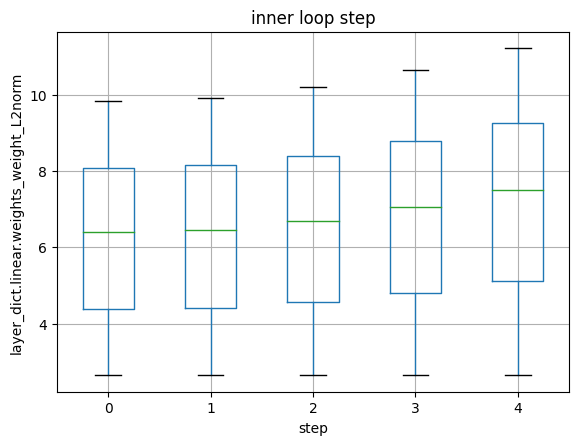

In [13]:
plt.figure(figsize=(8, 6))
norm_info_train.boxplot(column='layer_dict.linear.weights_weight_L2norm', by='num_step')
plt.title('inner loop step')
plt.xlabel('step')
plt.ylabel('layer_dict.linear.weights_weight_L2norm')
plt.suptitle('')  # 기본 제목 제거
plt.show()

<Figure size 800x600 with 0 Axes>

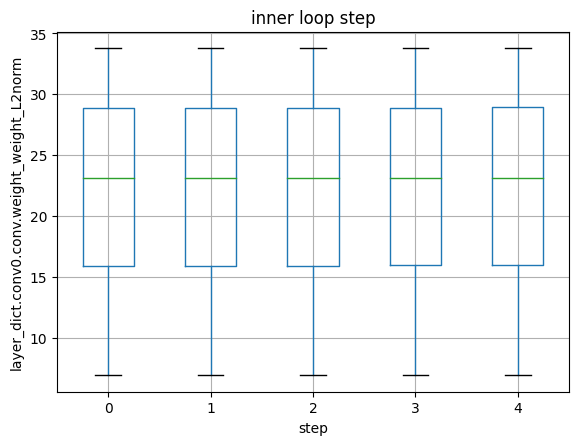

In [14]:
plt.figure(figsize=(8, 6))
norm_info_train.boxplot(column='layer_dict.conv3.conv.weight_weight_L2norm', by='num_step')
plt.title('inner loop step')
plt.xlabel('step')
plt.ylabel('layer_dict.conv0.conv.weight_weight_L2norm')
plt.suptitle('')  # 기본 제목 제거
plt.show()